<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/Simulaci-n-1/blob/main/transformada_inversa_polar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install numpy scipy

La función es una función de densidad de probabilidad (fdp).


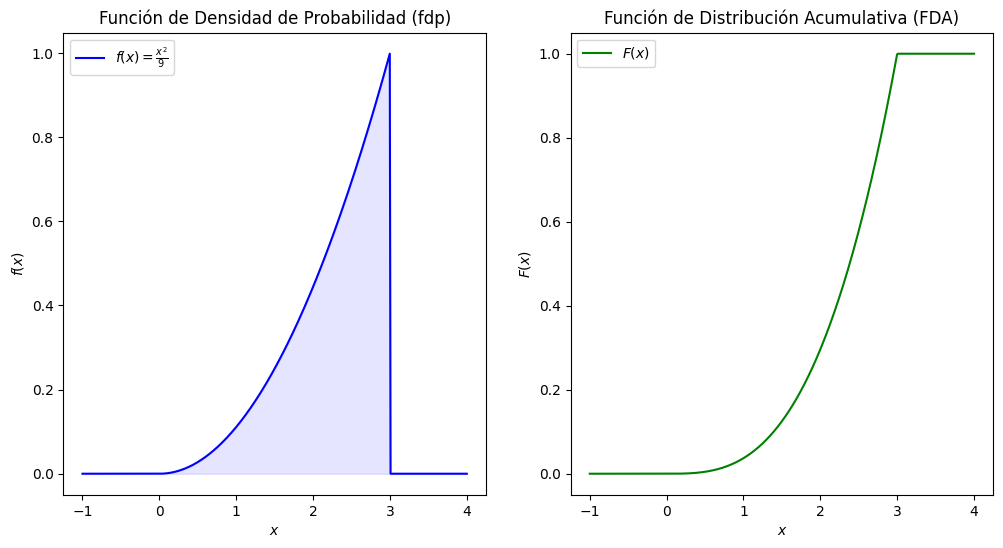

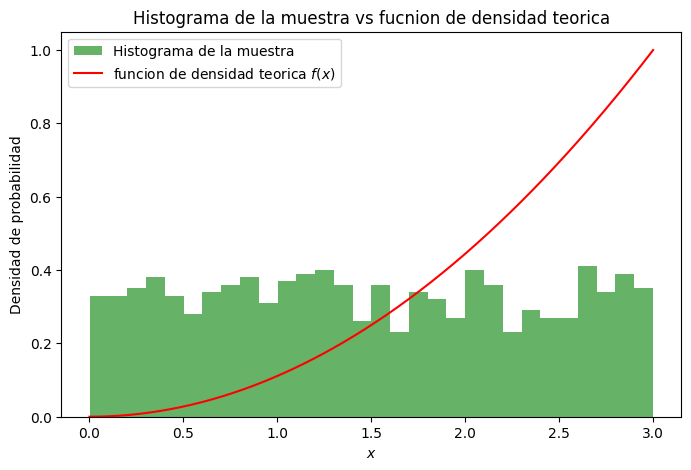

In [7]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Definir la función que queremos verificar
def f(x):
  if 0<=x<=3:
    return x**2/9
  else:
    return 0

#comprobar que f(x) es fdp
# 1) no negatividad
def fun_no_neg(f, dominio):
  #formar 1000 puntos en el dominio
  x_val=np.linspace(dominio[0], dominio[1], 1000)
  #verificar si es no negativa en todos los puntos
  for x in x_val:
    if f(x)<0:
      return False
  return True


# 2) verificar la normalizacion: la integral de la funcion
#f sobre el espacio debe ser igual a 1. esto garantiza que la prob. total sobre todos los
#posibles eventos es 1.
def fun_normalizacion(f, dominio):
  #calcular la integral de la funcion
  result, _ = quad(f, dominio[0], dominio[1])
  # Verificar si el resultado de la integral es aproximadamente 1
  return np.isclose(result, 1)

# Dominio para verificar la no negatividad (ajustar según sea necesario)
dominio = (0,3)

# Comprobaciones
no_negativa = fun_no_neg(f, dominio)
normalizacion = fun_normalizacion(f, dominio)

# Imprimir resultados
if no_negativa and normalizacion:
    print("La función es una función de densidad de probabilidad (fdp).")
else:
    if not no_negativa:
        print("La función no es no negativa en todo su dominio.")
    if not normalizacion:
        print("La integral de la función no es igual a 1.")

#ahora definimos la funcion de distribucion acumulativa
def F(x):
    if x < 0:
        return 0
    elif 0 <= x <= 3:
        return x**3 / 27
    else:
        return 1

# Crear un rango de valores para x
x_val = np.linspace(-1, 4, 500)#se coloca este rango para ver el comportamiento de la funcion desde otro dominio
f_val = [f(x) for x in x_val]
F_val = [F(x) for x in x_val]

# Graficar f(x) y F(x)
plt.figure(figsize=(12, 6))

# Graficar la función de densidad de probabilidad (fdp)
plt.subplot(1, 2, 1)
plt.plot(x_val, f_val, label='$f(x) = \\frac{x^2}{9}$', color="b")
plt.fill_between(x_val,f_val,alpha=0.1, color="b")
plt.title('Función de Densidad de Probabilidad (fdp)')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

# Graficar la función de distribución acumulativa (FDA)
plt.subplot(1, 2, 2)
plt.plot(x_val, F_val, label='$F(x)$', color="g")
plt.title('Función de Distribución Acumulativa (FDA)')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.legend()

plt.show()

#generamos as muestras uniformemente ditribuidas en [0,3]
np.random.seed(0)
muestras=np.random.uniform(0,3,1000)

#creamos el histograma
plt.figure(figsize=(8,5))
plt.hist(muestras, bins=30, density=True, alpha=0.6, color="g", label="Histograma de la muestra")

#sobreponiendo la fdp teorica
x_teorica=np.linspace(0,3,500)
f_teorica=[f(x) for x in x_teorica]
plt.plot(x_teorica, f_teorica, "r-", label="funcion de densidad teorica $f(x)$")
plt.title("Histograma de la muestra vs fucnion de densidad teorica")
plt.xlabel("$x$")
plt.ylabel("Densidad de probabilidad")
plt.legend()

plt.show()
